# Análisis de ventas Zara

In [1]:
#Cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns    

In [2]:
#Cargar el dataset
df = pd.read_csv("zara.csv", sep=';')

## Análisis inicial y limpieza

In [3]:
#Explorar primeras filas
print (df.head())


   Product ID Product Position Promotion Product Category Seasonal  \
0      185102            Aisle        No         Clothing       No   
1      188771            Aisle        No         Clothing       No   
2      180176          End-cap       Yes         Clothing      Yes   
3      112917            Aisle       Yes         Clothing      Yes   
4      192936          End-cap        No         Clothing      Yes   

   Sales Volume brand                                                url  \
0          2823  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1           654  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2          2220  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3          1568  Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4          2942  Zara  https://www.zara.com/us/en/double-faced-jacket...   

                sku                  name  \
0   272145190-250-2   BASIC PUFFER JACKET   
1  324052738-800-46         TUXE

In [4]:
# Capitalizar la primera letra de cada columna
df.columns = [col.capitalize() for col in df.columns]


In [5]:
#Ver columnas
print(df.columns)

Index(['Product id', 'Product position', 'Promotion', 'Product category',
       'Seasonal', 'Sales volume', 'Brand', 'Url', 'Sku', 'Name',
       'Description', 'Price', 'Currency', 'Scraped_at', 'Terms', 'Section'],
      dtype='object')


In [6]:
#Ver valores únicos en variables categóricas
print("Valores únicos en Product position:")
print(df['Product position'].unique())

print("\nValores únicos en Promotion:")
print(df['Promotion'].unique())

print("\nValores únicos en Product category:")
print(df['Product category'].unique())

print("\nValores únicos en Seasonal:")
print(df['Seasonal'].unique())

print("\nValores únicos en Brand:")
print(df['Brand'].unique())

print("\nValores únicos en Section:")
print(df['Section'].unique())

print("\nValores únicos en Terms:")
print(df['Terms'].unique())

Valores únicos en Product position:
['Aisle' 'End-cap' 'Front of Store']

Valores únicos en Promotion:
['No' 'Yes']

Valores únicos en Product category:
['Clothing']

Valores únicos en Seasonal:
['No' 'Yes']

Valores únicos en Brand:
['Zara']

Valores únicos en Section:
['MAN' 'WOMAN']

Valores únicos en Terms:
['jackets' 'shoes' 'sweaters' 'jeans' 't-shirts']


In [7]:

print(df.shape)

(252, 16)


In [8]:
#Ver estructura de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product id        252 non-null    int64  
 1   Product position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales volume      252 non-null    int64  
 6   Brand             252 non-null    object 
 7   Url               252 non-null    object 
 8   Sku               252 non-null    object 
 9   Name              251 non-null    object 
 10  Description       250 non-null    object 
 11  Price             252 non-null    float64
 12  Currency          252 non-null    object 
 13  Scraped_at        252 non-null    object 
 14  Terms             252 non-null    object 
 15  Section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [9]:
#Imprimir filas con valores nulos
print(df[df.isnull().any(axis=1)])

    Product id Product position Promotion Product category Seasonal  \
60      151925          End-cap       Yes         Clothing      Yes   
72      173576          End-cap       Yes         Clothing       No   

    Sales volume Brand                                                Url  \
60          2179  Zara  https://www.zara.com/us/en/vintage-effect-leat...   
72          1838  Zara         https://www.zara.com/us/en/-p04310461.html   

                 Sku                                  Name Description  Price  \
60  320774184-800-97  VINTAGE EFFECT LEATHER BOMBER JACKET         NaN  299.0   
72   336378923-700-2                                   NaN         NaN  129.0   

   Currency                  Scraped_at    Terms Section  
60      USD  2024-02-19T08:50:43.543555  jackets     MAN  
72      USD  2024-02-19T08:50:54.476057  jackets     MAN  


In [10]:
#Corregir valores nulos
df['Name'] = df['Name'].fillna('UNKNOWN')
df['Description'] = df['Description'].fillna('NO DESCRIPTION')

In [11]:
#Verificar si se compro el mismo producto
print(df['Product id'].duplicated().sum())

0


In [12]:
#Ver información estadística
print(df.describe())

          Product id  Sales volume       Price
count     252.000000    252.000000  252.000000
mean   153370.503968   1823.702381   86.252540
std     26160.444549    697.703748   52.083205
min    110075.000000    529.000000    7.990000
25%    131053.750000   1243.000000   49.900000
50%    151681.500000   1839.500000   79.900000
75%    175669.750000   2398.750000  109.000000
max    199631.000000   2989.000000  439.000000


In [13]:
# Ver estadísticas por categoría principal
print("Estadísticas por Section ")
print(df.groupby('Section')[['Price', 'Sales volume']].describe())
print("Estadisticas por Terms ")
print(df.groupby('Terms')[['Price', 'Sales volume']].describe())

#VerAnálisis de outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR)]
print(f"Outliers en precio: {len(outliers)} productos")

Estadísticas por Section 
         Price                                                        \
         count       mean        std   min   25%   50%    75%    max   
Section                                                                
MAN      218.0  91.824587  53.005153  9.99  59.9  89.9  109.0  439.0   
WOMAN     34.0  50.525882  25.250495  7.99  41.4  48.9   49.9  169.0   

        Sales volume                                                   \
               count         mean         std    min      25%     50%   
Section                                                                 
MAN            218.0  1817.426606  682.316755  529.0  1251.25  1839.5   
WOMAN           34.0  1863.941176  799.528230  542.0  1129.75  1847.0   

                          
             75%     max  
Section                   
MAN      2345.00  2989.0  
WOMAN    2602.25  2901.0  
Estadisticas por Terms 
          Price                                                               \
        

In [14]:
#Ver los outliers min y max
print("Productos más caros")
print(df[df['Price'] > 300][['Name', 'Price', 'Sales volume', 'Terms']])

print("Productos más baratos") 
print(df[df['Price'] < 10][['Name', 'Price', 'Sales volume', 'Terms']])

Productos más caros
                      Name  Price  Sales volume    Terms
13  CROPPED LEATHER JACKET  439.0           729  jackets
38            SUEDE JACKET  349.0          1860  jackets
Productos más baratos
                         Name  Price  Sales volume     Terms
139            RETRO SNEAKERS   9.99          2491     shoes
140   RETRO HIGH TOP SNEAKERS   9.99          2556     shoes
162  HIGH COLLAR KNIT SWEATER   7.99           542  sweaters
189   BASIC 100% WOOL SWEATER   7.99          2743  sweaters


MAN: tiene un precio promedio de 91.82 USD, con una gran dispersión (std = 53.00). El máximo es 439 USD, lo que indica productos premium o formales.
WOMAN: precio promedio mucho menor, 50.52 USD, con menor variabilidad (std = 25.25). Máximo de 169 USD.

Posiblemente la sección MAN ofrece productos más caros y con mayor variabilidad de precios, tal vez incluye ropa mas formal o premium. 
WOMAN, en cambio, tiene una oferta más homogénea y económica.

Ambas secciones tienen volúmenes medios de venta similares, MAN (1817) y WOMAN (1863) unidades promedio. Sin embargo, MAN tiene más productos en el dataset (218 vs 34).

A pesar de que WOMAN tiene menos productos, su volumen promedio de ventas es ligeramente superior, lo que sugiere que esos productos pueden ser más populares o tener mayor rotación. Esta ultima no la podemos analizar ya que no tenemos datos del stock o de un periodo de tiempo que permita realizar el análisis.

Precio promedio por categoría:

Más caros: jackets (105.76 USD).
Más baratos: sweaters (54.86 USD) y t-shirts (67.43 USD).
jeans y shoes tienen precios intermedios.

 Volumen de ventas:

Todos los tipos de prenda tienen volúmenes altos (medias entre 1665 y 1867 unidades).
El tipo más vendido, en media, es shoes (1867 unidades).
La mayor dispersión la tiene sweaters (std de 800).


Las jackets son los productos más caros pero también mantienen un volumen de ventas alto, lo que sugiere una buena aceptación a pesar del precio. Las t-shirts, aunque más baratas, tienen más variabilidad en ventas, lo cual podría deberse a diferencias en diseño o estacionalidad.

Se identificaron 4 outliers en precios, lo que sugiere la existencia de productos excepcionalmente caros o baratos respecto al resto del catálogo. Posteiormente se analizaran para entender si se trata de ediciones especiales, errores o promociones.

In [15]:
# Definir la paleta para todos los gráficos
general_palette= sns.color_palette("Paired")

## Análisis exploratorio detallado

### Histograma con curva KDE

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


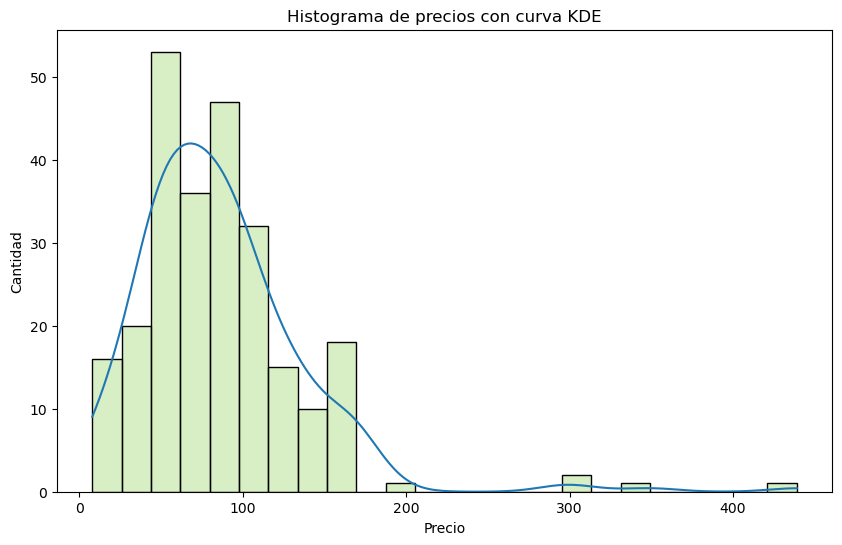

In [16]:
#Crear histograma con curva KDE
hist_color = general_palette[2] 

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Price'], kde=True, color=hist_color)
for line in ax.lines:
    line.set_color(general_palette[1]) 

plt.title('Histograma de precios con curva KDE')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.show()



Distribución sesgada a la derecha:
Hay muchas prendas con precios bajos o medios, y pocas con precios altos. Esto es común en marcas de moda accesible.

Precios más comunes:
La mayoría de las prendas tienen un precio entre 30 y 130 unidades monetarias. Ese es el rango donde Zara parece concentrar la mayoría de su oferta.

Presencia de productos caros (outliers):
Hay algunas prendas con precios superiores a 200, 300 o incluso 400, pero son muy pocas. Estas pueden ser productos especiales, como camperas, abrigos, o ediciones limitadas.

### Distribución de volumen de ventas

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


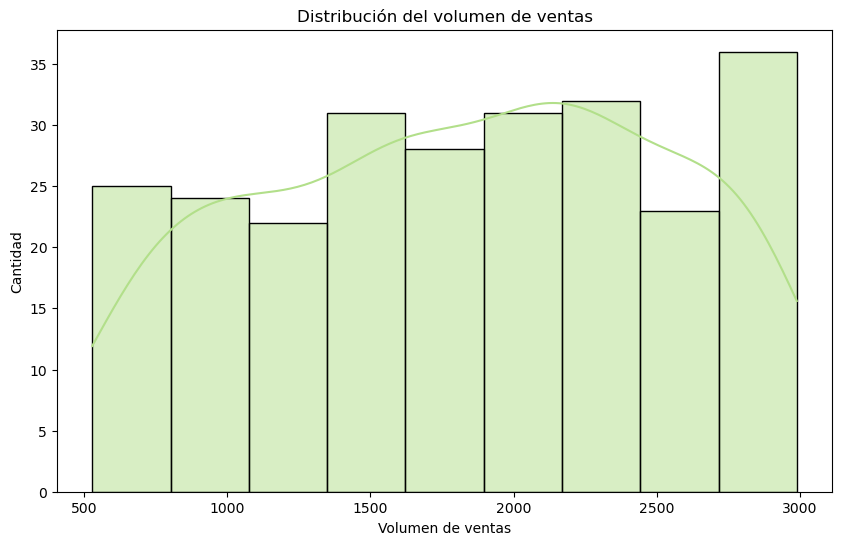

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales volume'], kde=True, color=hist_color)
plt.title('Distribución del volumen de ventas')
plt.xlabel('Volumen de ventas')
plt.ylabel('Cantidad')
plt.show()


### Relación Precio vs Volumen de Ventas

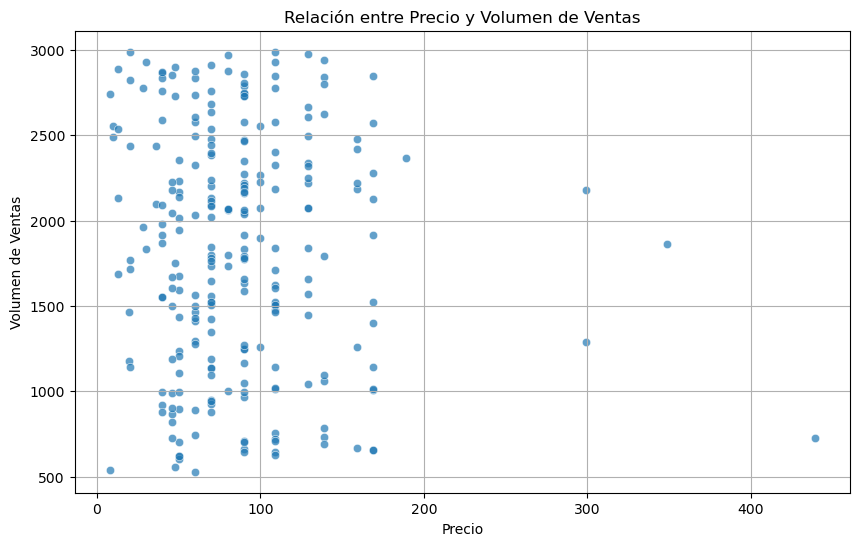

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Sales volume', alpha=0.7, color=general_palette[1])

plt.title('Relación entre Precio y Volumen de Ventas')
plt.xlabel('Precio')
plt.ylabel('Volumen de Ventas')
plt.grid(True)
plt.show()

Los productos más baratos son los que más se venden.
A medida que sube el precio, en general, las ventas disminuyen. Aunque hay algunos productos caros que se venden bastante, son la minoría.

### Relación Precio vs Volumen de Ventas por tipo de prenda

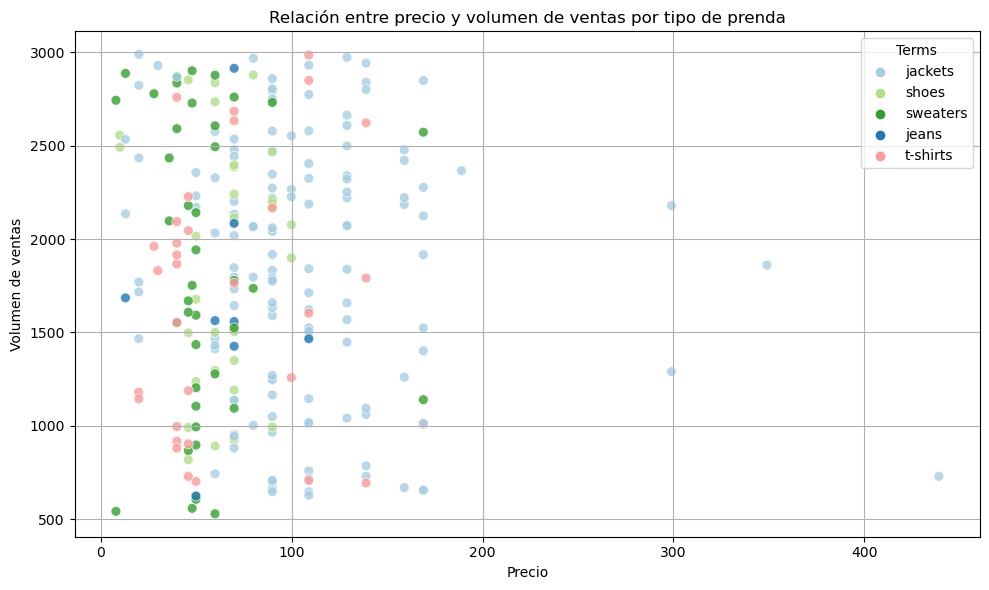

In [19]:
categories_terms = sorted(df['Terms'].unique())
palette_terms = dict(zip(categories_terms, general_palette[:len(categories_terms)]))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales volume',
    hue='Terms',
    palette=palette_terms,
    s=50,
    alpha=0.8
)
plt.title('Relación entre precio y volumen de ventas por tipo de prenda')
plt.xlabel('Precio')
plt.ylabel('Volumen de ventas')
plt.grid(True)
plt.legend(title='Terms')
plt.tight_layout()
plt.show()

Distribución por categorías:

Jackets: Son la categoría predominante, con precios entre 20 y 120 y ventas muy variables, desde 500 hasta 3000 unidades. Esto indica una amplia variedad dentro de esta categoría, posiblemente con distintos submodelos o calidades.

Sweaters: Concentrados en precios bajos (0-60) y ventas moderadas, lo que sugiere que son productos accesibles con demanda estable.

Shoes: Pocos datos, distribuidos en precios medios, lo que puede indicar menor variedad o volumen de ventas.

Jeano: Muy pocos puntos, ubicados en precios bajos, posiblemente un segmento de bajo volumen o de nicho.

T-shirts: Distribución dispersa tanto en precio como en volumen, quizá por variedad de estilos y calidades.


La categoría Jackets tiene gran variabilidad tanto en precios como en volumen, reflejando posiblemente una estrategia de producto diversificada.
Se observa una concentración general en precios bajos a medios (0-100), lo que puede indicar un mercado más sensible al precio.
Los mayores volúmenes de venta están asociados a productos de precio medio-bajo, sugiriendo que los clientes prefieren productos con buena relación precio-calidad.

### Top 10 productos más vendidos

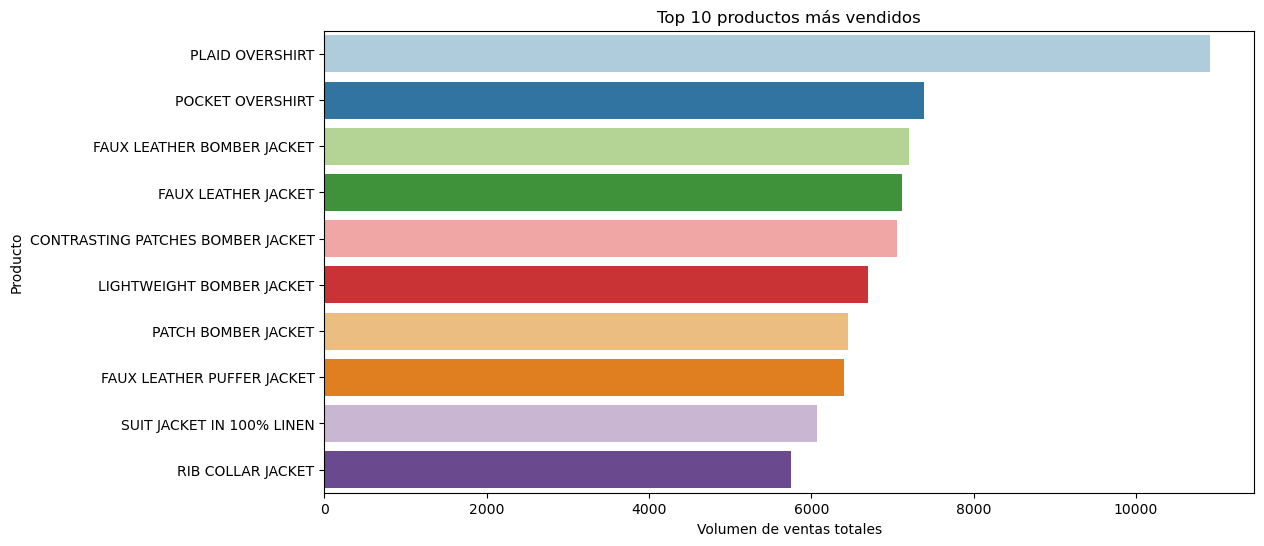

In [20]:
sales_by_product = df.groupby('Name')['Sales volume'].sum().reset_index()

sales_by_product = sales_by_product.sort_values(by='Sales volume', ascending=False)

top_10 = sales_by_product.head(10)


palette_for_bars = general_palette[:10]

plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x='Sales volume', y='Name', palette=palette_for_bars)
plt.title('Top 10 productos más vendidos')
plt.xlabel('Volumen de ventas totales')
plt.ylabel('Producto')
plt.show()

### Relación Precio vs Volumen de Ventas por sección (MAN/WOMAN)

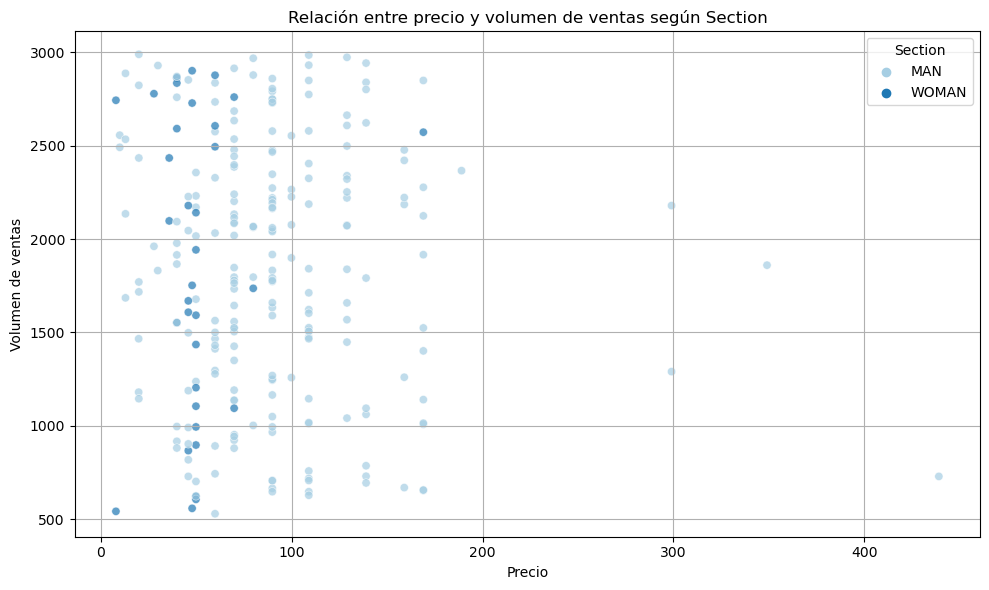

In [21]:
categories_section = sorted(df['Section'].unique())

palette_section = dict(zip(categories_section, general_palette[:2]))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales volume',
    hue='Section',
    palette=palette_section,
    alpha=0.7
)

plt.title('Relación entre precio y volumen de ventas según Section')
plt.xlabel('Precio')
plt.ylabel('Volumen de ventas')
plt.grid(True)
plt.legend(title='Section')
plt.tight_layout()
plt.show()

Tendencia principal:

Se evidencia una relación inversa clara: a medida que el precio aumenta, el volumen de ventas tiende a disminuir, conforme a la ley básica de demanda.
La mayoría de los productos están en el rango de precios entre 0 y 150, indicando que el mercado está mayormente enfocado en esta banda de precios.
Hay una dispersión considerable en los datos, lo que indica que además del precio, otros factores (marca, promoción, temporada, tipo de producto) influyen en las ventas.

Zonas de concentración:

Alta densidad: Precios entre 20-80, con volúmenes de ventas entre 1500 y 2800 unidades, donde se concentra la mayor parte del mercado activo.
Zona media: Precios entre 80-120, con volúmenes entre 1000 y 2000 unidades, posiblemente productos con características más específicas o calidad superior.
Productos premium: Precios superiores a 200, con volúmenes muy bajos, mostrando que la demanda para productos caros es limitada y especializada.

### Análisis de elasticidad por segmentos

In [38]:
# Análisis de elasticidad por segmentos
for section in df['Section'].unique():
    subset = df[df['Section'] == section]
    correlation = subset['Price'].corr(subset['Sales volume'])
    print(f"Correlación Precio-Ventas en {section}: {correlation:.3f}")

Correlación Precio-Ventas en MAN: -0.085
Correlación Precio-Ventas en WOMAN: 0.111


### Matriz de correlación de variables numéricas

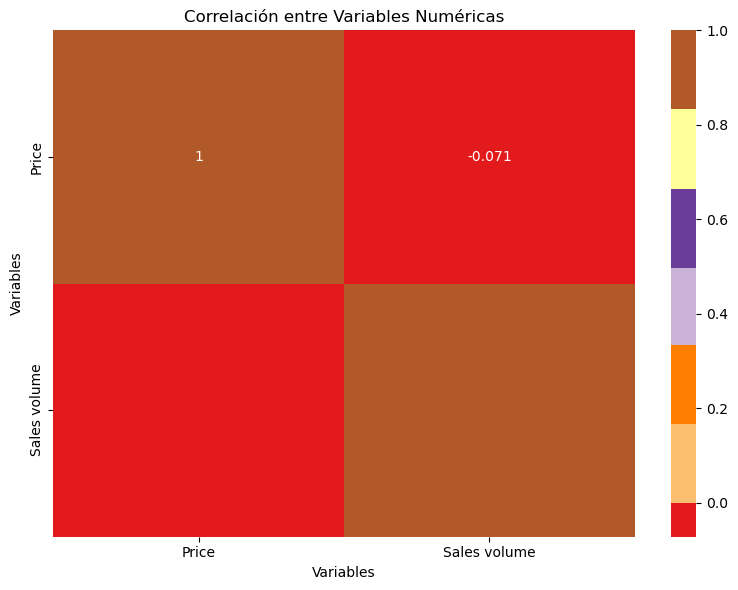

In [36]:
correlation_matrix = df[['Price', 'Sales volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Paired", center=0)
plt.title('Correlación entre Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.grid(False)  # usualmente se pone False en heatmaps
plt.tight_layout()

plt.show()

In [37]:
# Análisis de rangos de precio
df['Price_Range'] = pd.cut(df['Price'], 
                          bins=[0, 50, 100, 150, 300, 500], 
                          labels=['$0-50', '$50-100', '$100-150', '$150-300', '$300+'])

price_range_analysis = df.groupby('Price_Range').agg({
    'Sales volume': ['count', 'mean', 'sum'],
    'Product id': 'count'
}).round(2)
print(price_range_analysis)

/var/folders/8v/xdcjkgx91ws__19ldkx332g40000gn/T/ipykernel_82909/1836452052.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_analysis = df.groupby('Price_Range').agg({


            Sales volume                  Product id
                   count     mean     sum      count
Price_Range                                         
$0-50                 71  1800.86  127861         71
$50-100              107  1874.33  200553        107
$100-150              51  1811.10   92366         51
$150-300              21  1724.00   36204         21
$300+                  2  1294.50    2589          2


### Análisis del impacto de variables categóricas

In [39]:
# Efectividad por [Factor]
effectiveness = calculate_effectiveness('Product position')
print("Efectividad por ubicación del producto:")
print(effectiveness)

Efectividad por ubicación del producto:
                         mean         std  count
Product position                                
Aisle             1828.824742  711.114633     97
End-cap           1778.255814  668.219270     86
Front of Store    1873.144928  720.865152     69


In [40]:
def resumen_ventas_por_factor(factor_column):
    return df.groupby(factor_column)['Sales volume'].agg(['mean', 'std', 'count']).round(2)

#### Análisis por ubicación del producto

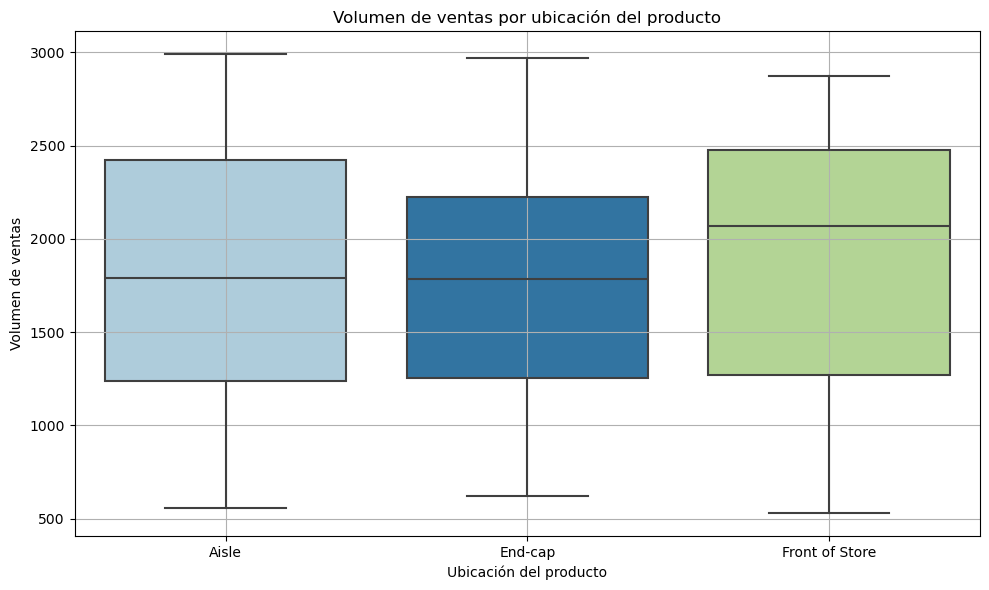

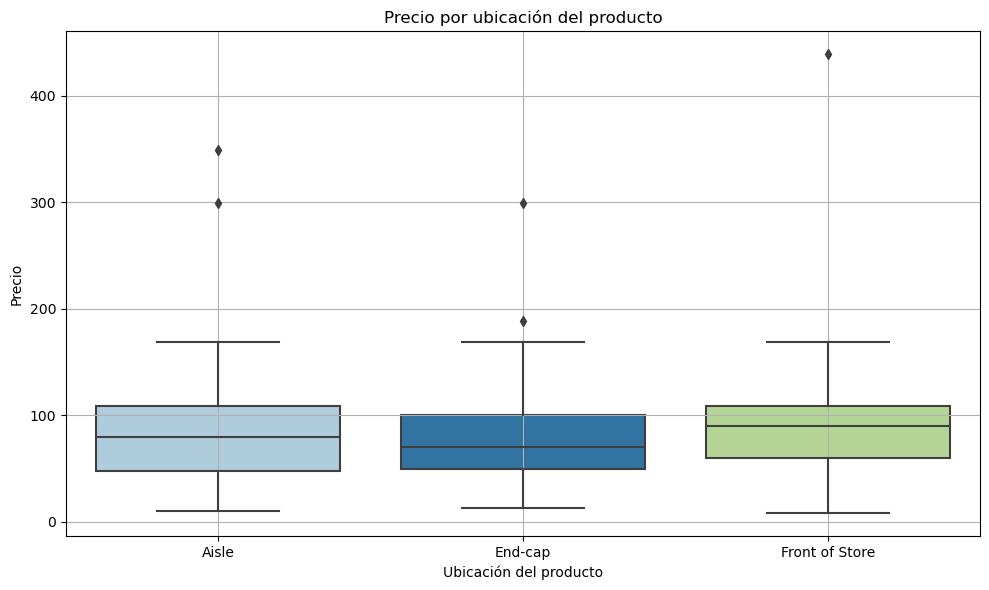

In [23]:
categories_pos = sorted(df['Product position'].unique())

palette_pos = dict(zip(categories_pos, general_palette[:3]))

#Bogplot volumen de ventas x product position
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product position', y='Sales volume', palette=palette_pos)
plt.title('Volumen de ventas por ubicación del producto')
plt.xlabel('Ubicación del producto')
plt.ylabel('Volumen de ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

#Bloxplot precio x product position
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product position', y='Price', palette=palette_pos)
plt.title('Precio por ubicación del producto')
plt.xlabel('Ubicación del producto')
plt.ylabel('Precio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
position_effectiveness = resumen_ventas_por_factor('Product position')
print("Efectividad por ubicación del producto:")
print(position_effectiveness)

Efectividad por ubicación del producto:
                     mean     std  count
Product position                        
Aisle             1828.82  711.11     97
End-cap           1778.26  668.22     86
Front of Store    1873.14  720.87     69


Se ven diferencias mínimas entre posiciones. El precio en "Front of Store" es ligeramente más caro, pero no significativo.

Layout sub-óptimo: No se está aprovechando Front of Store
Merchandising mejorable: End-cap no muestra ventaja clara
Oportunidad perdida: Las ubicaciones premium no generan premium

#### Impacto de la promoción en ventas

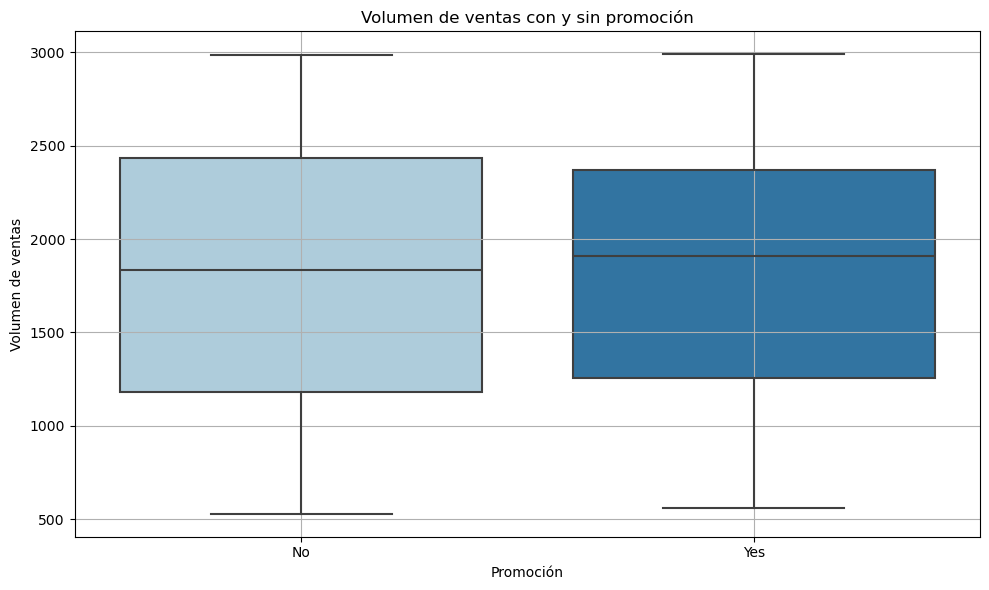

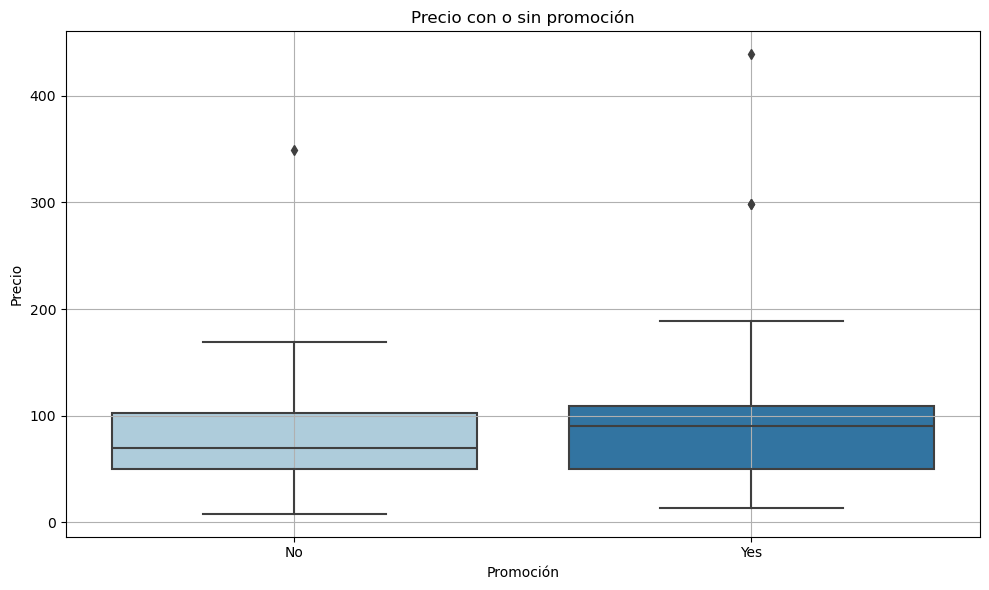

In [24]:
categories_promo = sorted(df['Promotion'].unique())  
palette_promo = dict(zip(categories_promo, general_palette[:2]))

#Boxplot volumen de ventas con y sin promo
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Promotion', y='Sales volume', palette=palette_promo)
plt.title('Volumen de ventas con y sin promoción')
plt.xlabel('Promoción')
plt.ylabel('Volumen de ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

#Boxplot precio con y sin promo
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Promotion', y='Price', palette=palette_promo)
plt.title('Precio con o sin promoción')
plt.xlabel('Promoción')
plt.ylabel('Precio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
promo_effectiveness = resumen_ventas_por_factor('Promotion')
print("Efectividad por Promoción:")
print(promo_effectiveness)

Efectividad por Promoción:
              mean     std  count
Promotion                        
No         1820.55  715.71    132
Yes        1827.18  680.32    120


#### Impacto de los productos de temporada

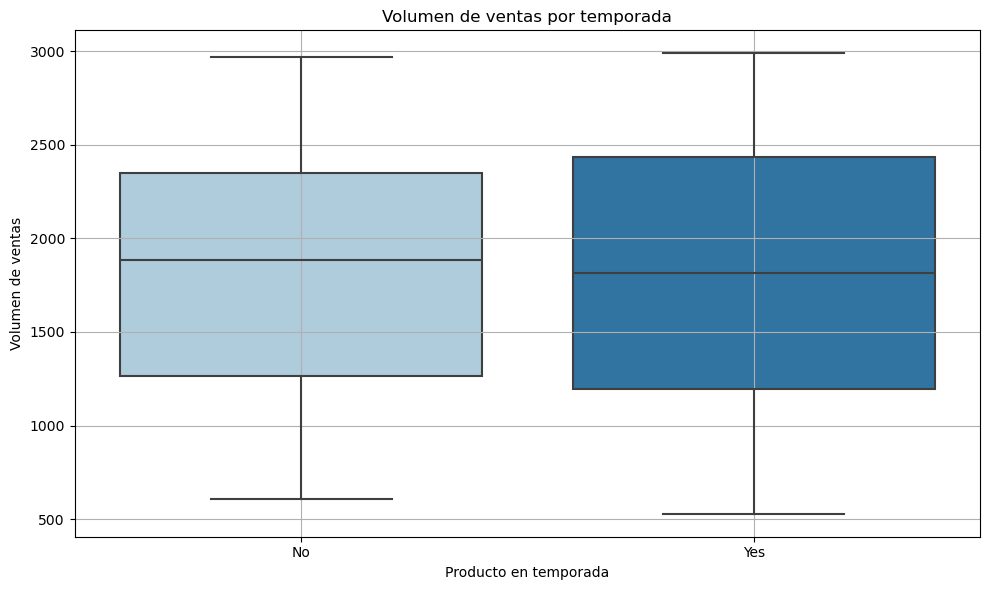

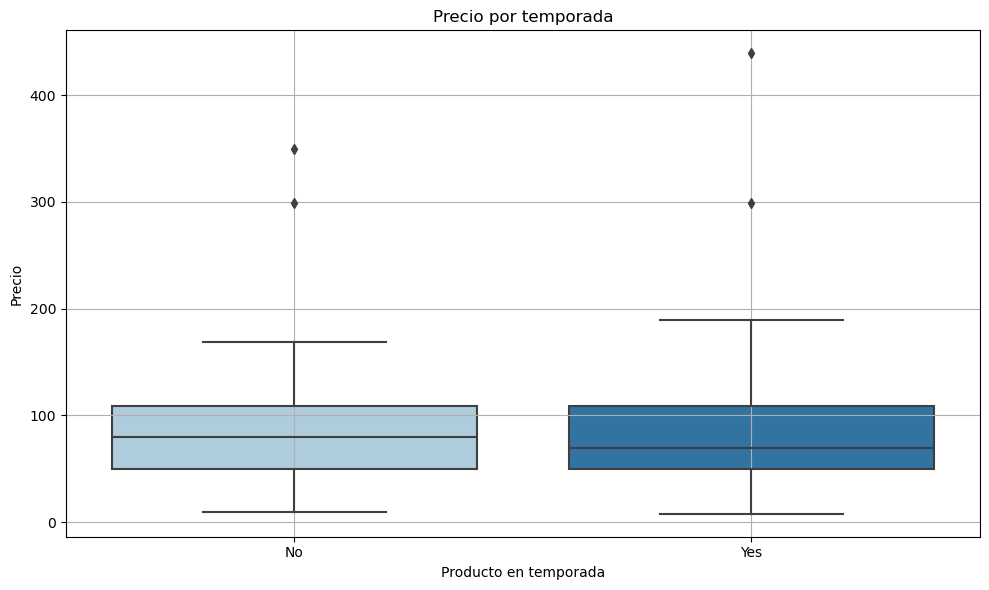

In [25]:
categories_seasonal = sorted(df['Seasonal'].unique())  
palette_seasonal = dict(zip(categories_seasonal, general_palette[:2]))

# Boxplot Volumen de ventas por temporada
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Seasonal', y='Sales volume', palette=palette_seasonal)
plt.title('Volumen de ventas por temporada')
plt.xlabel('Producto en temporada')
plt.ylabel('Volumen de ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

#Boxplot precio por temporada
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Seasonal', y='Price', palette=palette_seasonal)
plt.title('Precio por temporada')
plt.xlabel('Producto de temporada')
plt.ylabel('Precio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
seasonal_effectiveness = resumen_ventas_por_factor('Seasonal')
print("Efectividad por Temporada:")
print(seasonal_effectiveness)

Efectividad por Temporada:
             mean     std  count
Seasonal                        
No        1825.74  691.10    124
Yes       1821.73  706.75    128


### Combinaciones cruzadas (Temporada + Promoción / Temporada + Tipo de prenda)

#### Promedio de ventas por Temporada y Promoción

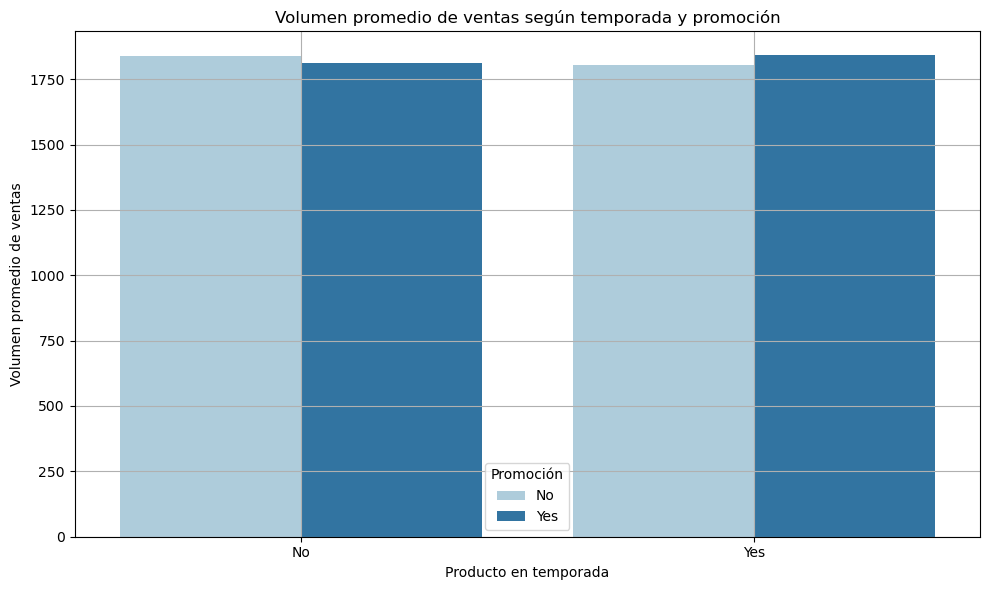

In [26]:
# Promedio de ventas por combinación Seasonal + Promotion
avg_sales_by_season_promo = df.groupby(['Seasonal', 'Promotion'])['Sales volume'].mean().reset_index()

promotion_categories = sorted(df['Promotion'].unique())
palette_promotion = dict(zip(promotion_categories, general_palette[:2]))

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_sales_by_season_promo,
    x='Seasonal',
    y='Sales volume',
    hue='Promotion',
    palette=palette_promotion
)
plt.title('Volumen promedio de ventas según temporada y promoción')
plt.xlabel('Producto de temporada')
plt.ylabel('Volumen promedio de ventas')
plt.legend(title='Promoción')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Promedio de ventas por temporada y tipo de prenda


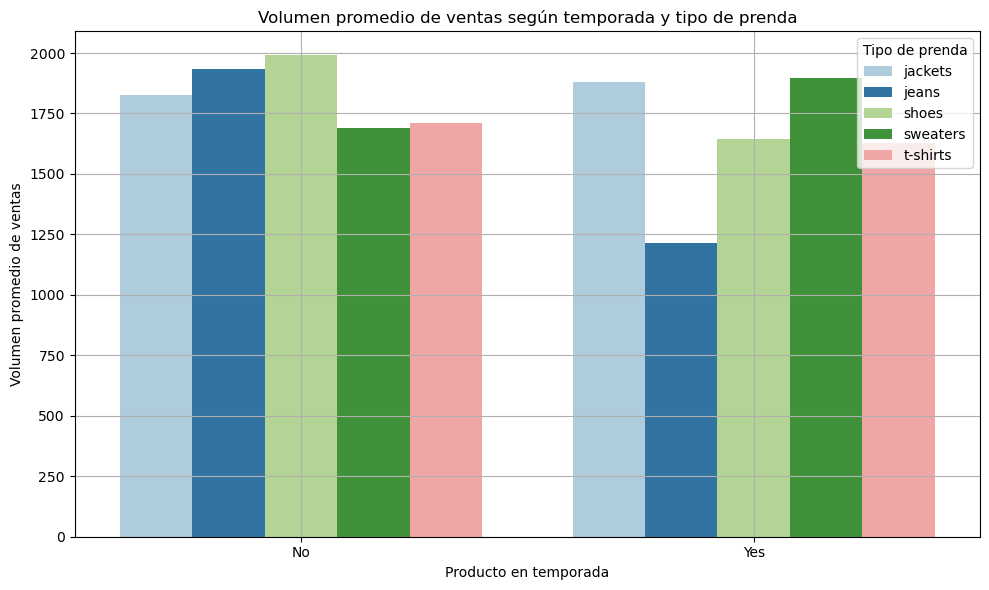

In [27]:
# Promedio de ventas por combinación Seasonal + terms
avg_sales_by_season_terms = df.groupby(['Seasonal', 'Terms'])['Sales volume'].mean().reset_index()

# Paleta para Terms desde general_palette
terms_categories = sorted(df['Terms'].unique())
palette_terms = dict(zip(terms_categories, general_palette[:len(terms_categories)]))

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_sales_by_season_terms,
    x='Seasonal',
    y='Sales volume',
    hue='Terms',
    palette=palette_terms
)
plt.title('Volumen promedio de ventas según temporada y tipo de prenda')
plt.xlabel('Producto en temporada')
plt.ylabel('Volumen promedio de ventas')
plt.legend(title='Tipo de prenda')
plt.grid(True)
plt.tight_layout()
plt.show()

### Segmentación por tipo de prenda y sección

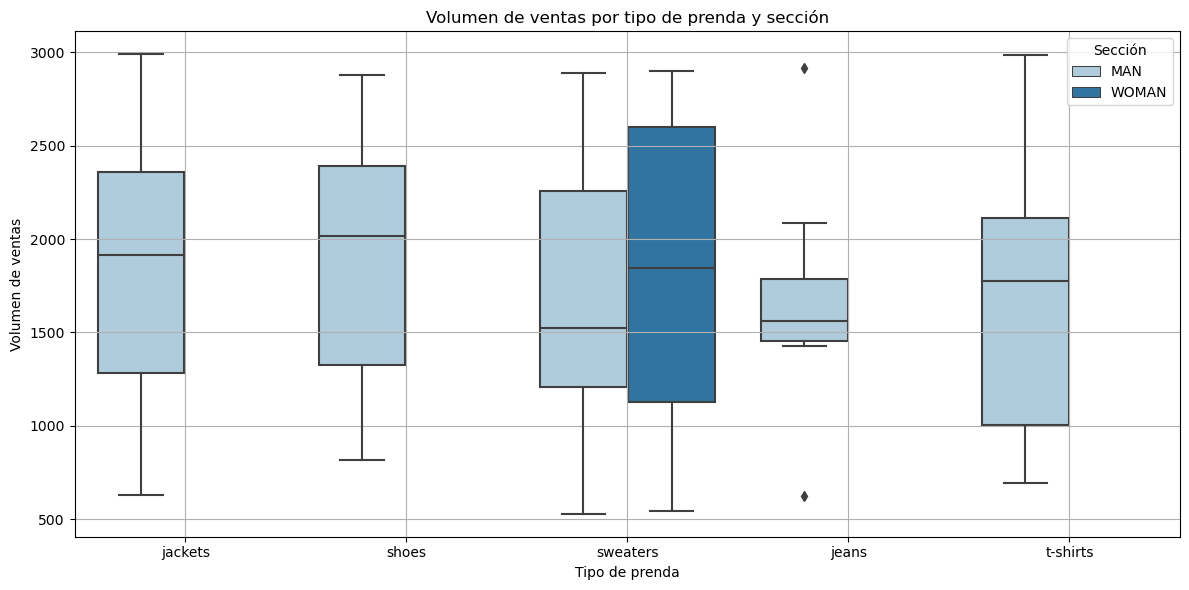

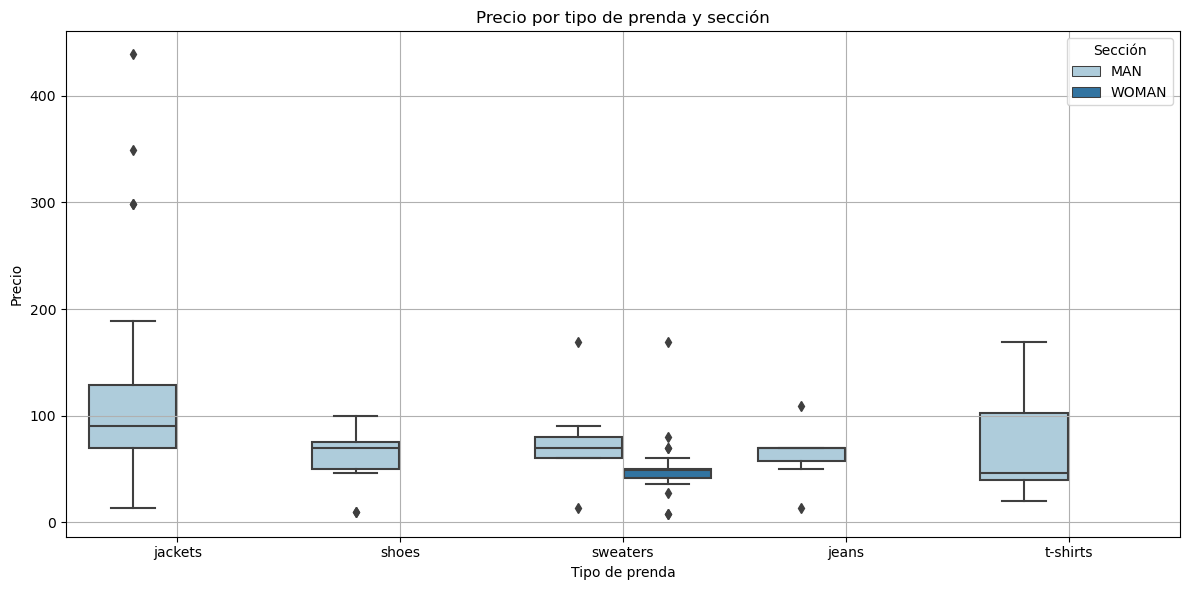

In [28]:
section_categories = sorted(df['Section'].unique())  # ['MAN', 'WOMAN']

# Usar los primeros 2 colores de general_palette para Section
palette_section = dict(zip(section_categories, general_palette[:2]))

# Boxplot: Volumen de ventas por tipo de prenda y sección
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Terms', y='Sales volume', hue='Section', palette=palette_section)
plt.title('Volumen de ventas por tipo de prenda y sección')
plt.xlabel('Tipo de prenda')
plt.ylabel('Volumen de ventas')
plt.legend(title='Sección')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Precio por tipo de prenda y sección
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Terms', y='Price', hue='Section', palette=palette_section)
plt.title('Precio por tipo de prenda y sección')
plt.xlabel('Tipo de prenda')
plt.ylabel('Precio')
plt.legend(title='Sección')
plt.grid(True)
plt.tight_layout()
plt.show()

### Análisis cruzado: promoción y temporada por tipo de prenda

In [29]:
# Porcentaje de productos en promoción por tipo de prenda
promo_percent = df.groupby('Terms')['Promotion'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
print(promo_percent)

# Volumen promedio para prendas estacionales con y sin promoción
season_promo_vol = df.groupby(['Terms', 'Seasonal', 'Promotion'])['Sales volume'].mean().reset_index()
print(season_promo_vol)

      Terms Promotion  percentage
0   jackets        No   51.428571
1   jackets       Yes   48.571429
2     jeans        No   62.500000
3     jeans       Yes   37.500000
4     shoes       Yes   51.612903
5     shoes        No   48.387097
6  sweaters        No   56.097561
7  sweaters       Yes   43.902439
8  t-shirts        No   53.125000
9  t-shirts       Yes   46.875000
       Terms Seasonal Promotion  Sales volume
0    jackets       No        No   1893.055556
1    jackets       No       Yes   1749.906250
2    jackets      Yes        No   1840.722222
3    jackets      Yes       Yes   1918.194444
4      jeans       No        No   1996.750000
5      jeans       No       Yes   1685.000000
6      jeans      Yes        No    624.000000
7      jeans      Yes       Yes   1512.000000
8      shoes       No        No   1828.500000
9      shoes       No       Yes   2151.800000
10     shoes      Yes        No   2055.000000
11     shoes      Yes       Yes   1304.666667
12  sweaters       No       

### Análisis de precios por tipo de prenda y posición

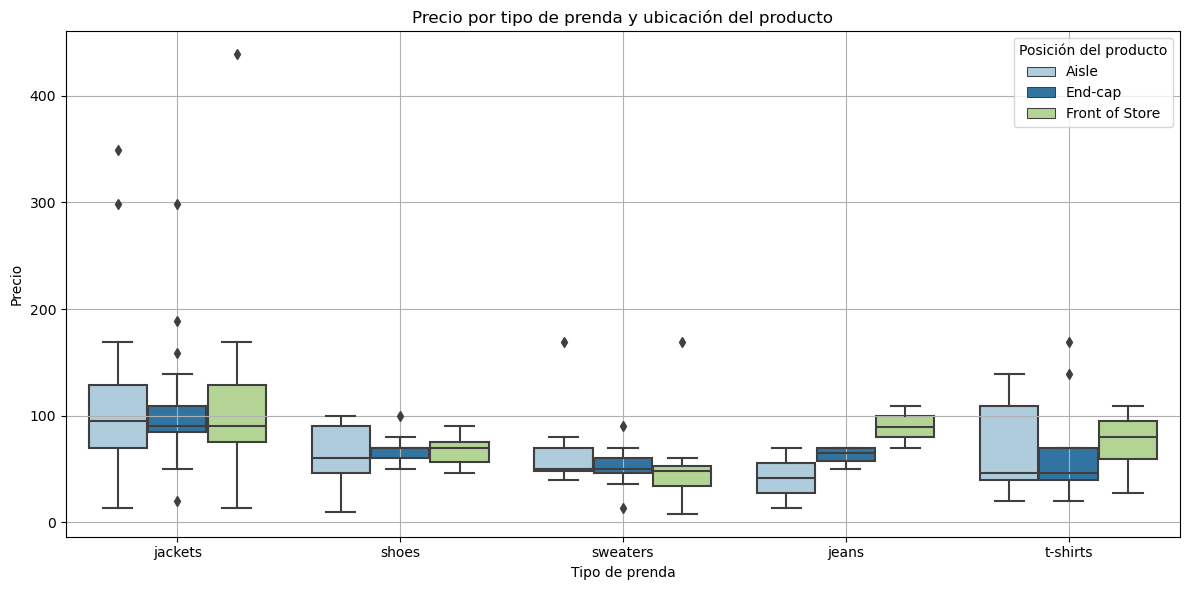

In [30]:
# Boxplot: Precio por tipo de prenda y posición del producto
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Terms', y='Price', hue='Product position', palette=general_palette)
plt.title('Precio por tipo de prenda y ubicación del producto')
plt.xlabel('Tipo de prenda')
plt.ylabel('Precio')
plt.legend(title='Posición del producto')
plt.grid(True)
plt.tight_layout()
plt.show()

### Análisis de volumen de ventas por tipo de prenda y posición

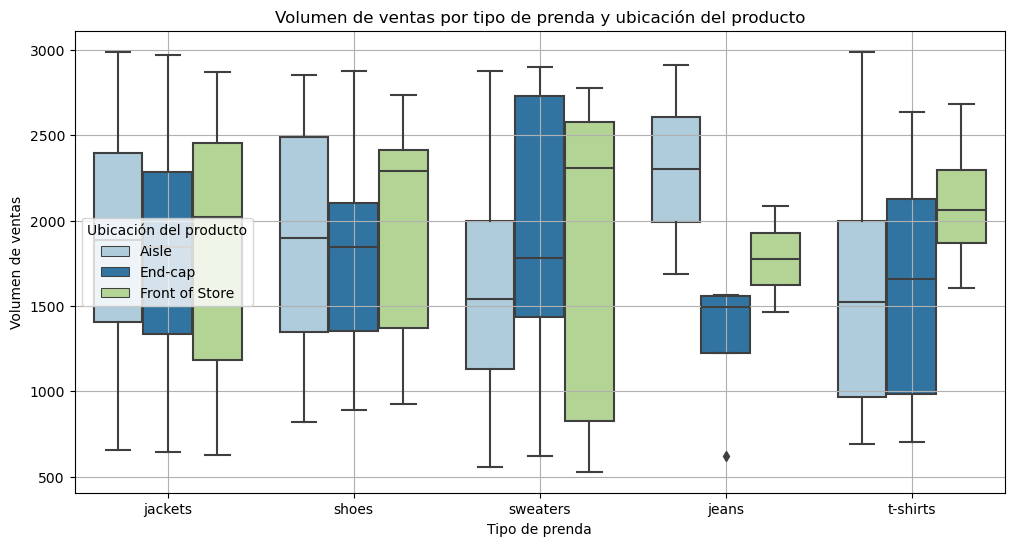

In [31]:
# Boxplot: Volumen de ventas por tipo de prenda y posición del producto
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Terms', y='Sales volume', hue='Product position', palette=general_palette)
plt.title('Volumen de ventas por tipo de prenda y ubicación del producto')
plt.xlabel('Tipo de prenda')
plt.ylabel('Volumen de ventas')
plt.legend(title='Ubicación del producto')
plt.grid(True)
plt.show()

In [32]:
# Efectividad de cada factor (agregar después de cada boxplot)
def calculate_effectiveness(factor_column):
    anova_result = df.groupby(factor_column)['Sales volume'].agg(['mean', 'std', 'count'])
    return anova_result

# Ejemplo después del análisis de posición:
position_effectiveness = calculate_effectiveness('Product position')
print("Efectividad por posición:", position_effectiveness)

Efectividad por posición:                          mean         std  count
Product position                                
Aisle             1828.824742  711.114633     97
End-cap           1778.255814  668.219270     86
Front of Store    1873.144928  720.865152     69


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


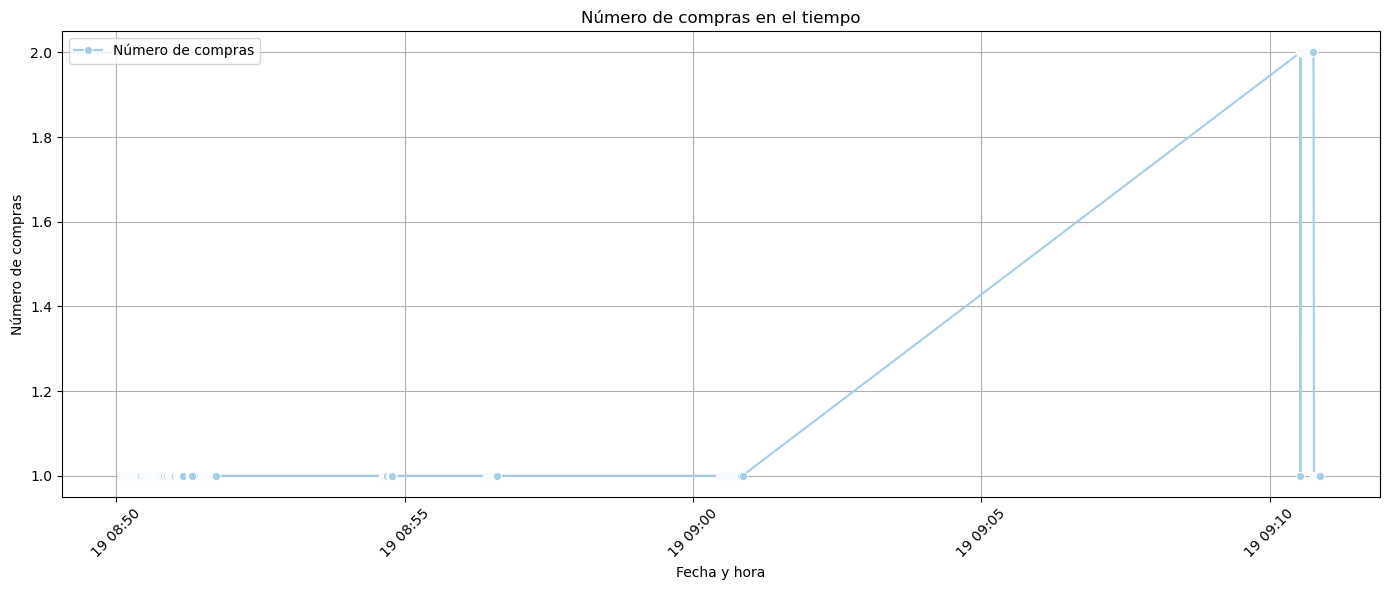

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


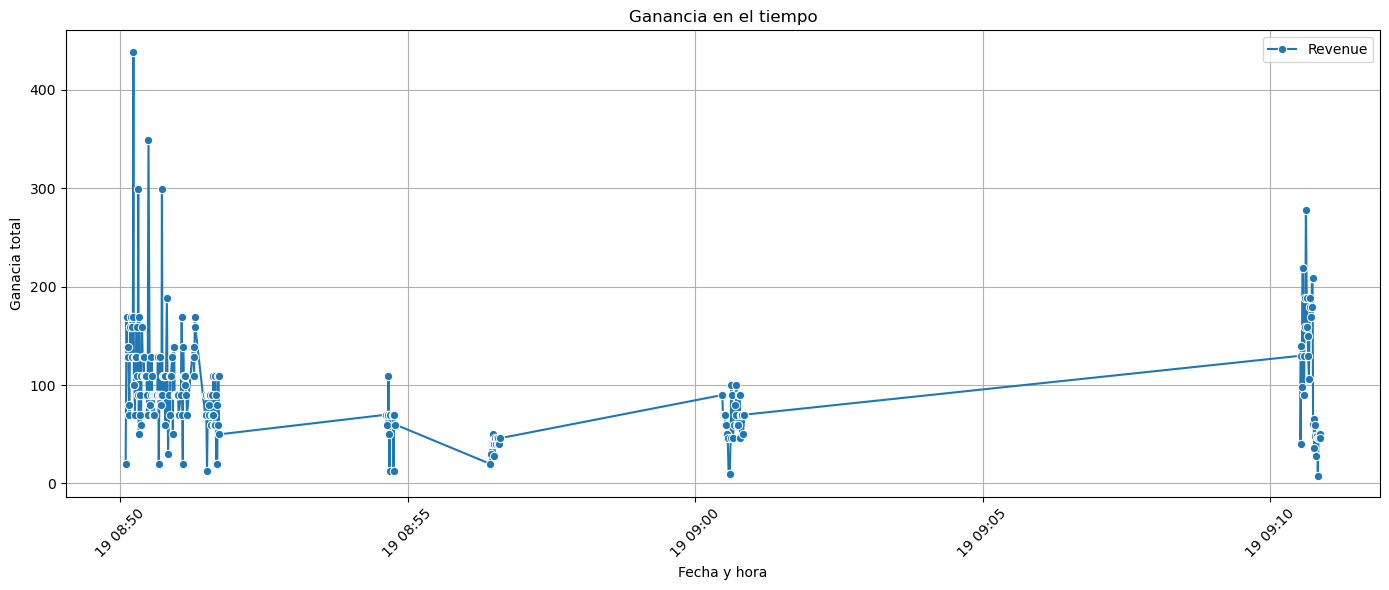

In [33]:
df['Scraped_at'] = pd.to_datetime(df['Scraped_at'])
# Número de compras a lo largo del tiempo
purchases_over_time = df.groupby('Scraped_at').size()
# Ingresos (revenue) a lo largo del tiempo
purchase_revenue = df.groupby('Scraped_at')['Price'].sum()

color_purchases = general_palette[0]
color_revenue = general_palette[1]

# Gráfico número de compras
plt.figure(figsize=(14, 6))
sns.lineplot(x=purchases_over_time.index, y=purchases_over_time.values, 
             marker='o', label='Número de compras', color=color_purchases)
plt.title('Número de compras en el tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de compras')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico ingresos
plt.figure(figsize=(14, 6))
sns.lineplot(x=purchase_revenue.index, y=purchase_revenue.values, 
             marker='o', label='Revenue', color=color_revenue)
plt.title('Ganancia en el tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Ganacia total')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/8v/xdcjkgx91ws__19ldkx332g40000gn/T/ipykernel_82909/1063676517.py:2: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.lineplot(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


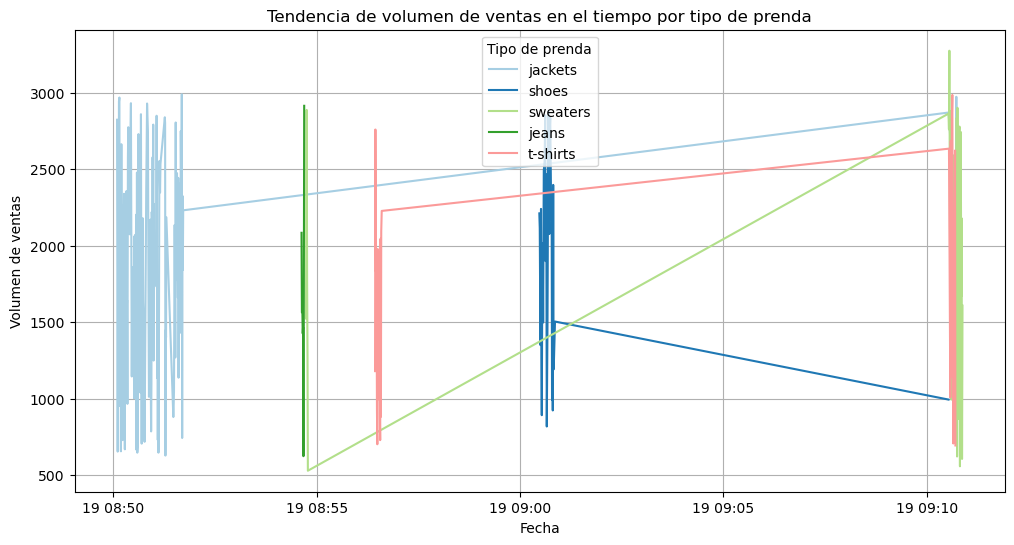

In [34]:

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Scraped_at',
    y='Sales volume',
    hue='Terms',
    estimator='sum',
    palette=general_palette,
    errorbar=None
)

plt.title('Tendencia de volumen de ventas en el tiempo por tipo de prenda')
plt.xlabel('Fecha')
plt.ylabel('Volumen de ventas')
plt.legend(title='Tipo de prenda')
plt.grid(True)
plt.show()

Todas las compras fueron registradas el mismo día dentro de un rango de 2 horas. Esto indica que el dataset representa un "snapshot" de ventas más que un historial. Por lo tanto, los análisis temporales extensos no son aplicables en este caso

### Inisghts


In [35]:
# Resumen de métricas clave
print("Métricas clave del snapshot")
print(f"Volumen total de ventas: {df['Sales volume'].sum():,}")
print(f"Precio promedio ponderado: ${df['Price'].mean():.2f}")
print(f"Ticket promedio: ${(df['Price'] * df['Sales volume']).sum() / df['Sales volume'].sum():.2f}")
print(f"Productos únicos: {df['Product id'].nunique()}")

# 8.2 Top insights
print("\nTop 3 insights")
print("1. Producto estrella:", df.loc[df['Sales volume'].idxmax(), 'Name'])
print("2. Categoría dominante:", df['Terms'].mode()[0])
print("3. Precio óptimo aparente:", f"${df.loc[df['Sales volume'].idxmax(), 'Price']:.2f}")

# 8.3 Alertas operativas
low_performers = df[df['Sales volume'] < df['Sales volume'].quantile(0.1)]
print(f"\nAlertas")
print(f"Productos con bajo rendimiento: {len(low_performers)}")
print("Categorías a revisar:", low_performers['Terms'].value_counts().head(3).to_dict())

Métricas clave del snapshot
Volumen total de ventas: 459,573
Precio promedio ponderado: $86.25
Ticket promedio: $84.84
Productos únicos: 252

Top 3 insights
1. Producto estrella: PLAID TIE DYE OVERSHIRT
2. Categoría dominante: jackets
3. Precio óptimo aparente: $19.99

Alertas
Productos con bajo rendimiento: 26
Categorías a revisar: {'jackets': 15, 'sweaters': 5, 't-shirts': 4}
